<a href="https://colab.research.google.com/github/ruchira0011/Telco---Customer-churning-prediction-model/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
%matplotlib inline 

In [103]:
!ls

sample_data  Telco-Customer-Churn.csv


In [104]:
telco_churn_data = pd.read_csv('Telco-Customer-Churn.csv')

In [105]:
telco_churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [106]:
telco_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [107]:
telco_churn_data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


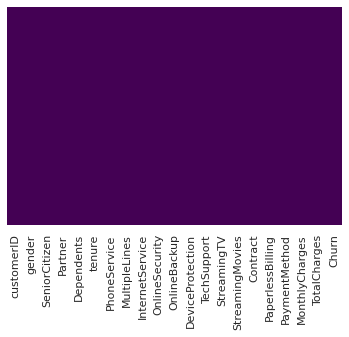

In [108]:
sns.heatmap(telco_churn_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

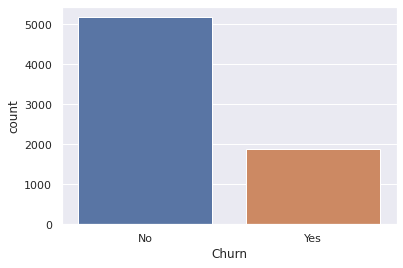

In [109]:
sns.countplot(x='Churn', data=telco_churn_data)

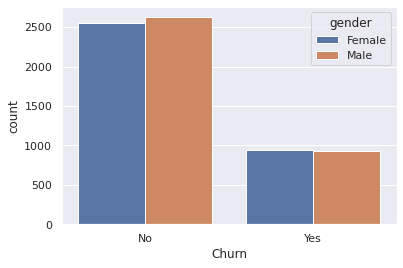

In [110]:
sns.countplot(x='Churn', hue= 'gender', data=telco_churn_data)

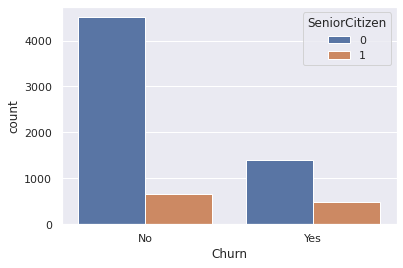

In [111]:
sns.countplot(x='Churn', hue= 'SeniorCitizen', data=telco_churn_data)

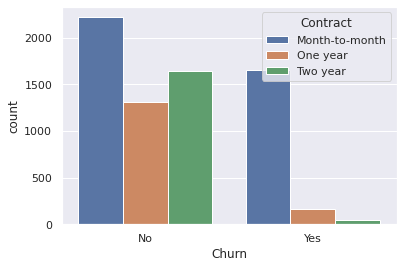

In [112]:
sns.countplot(x='Churn', hue= 'Contract', data=telco_churn_data)

In [113]:
yes_no_mapping = { 'Yes': 1, 'No' : 0}
telco_churn_data['Partner'] = telco_churn_data['Partner'].map(yes_no_mapping)
telco_churn_data['Dependents'] = telco_churn_data['Dependents'].map(yes_no_mapping)
telco_churn_data['PhoneService'] = telco_churn_data['PhoneService'].map(yes_no_mapping)

In [114]:
telco_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [115]:
InternetServiceMapping = {'Yes': 1, 'No': 0, 'No internet service' : 0}
telco_churn_data['OnlineSecurity'] = telco_churn_data['OnlineSecurity'].map(InternetServiceMapping)
telco_churn_data['OnlineBackup'] = telco_churn_data['OnlineBackup'].map(InternetServiceMapping)
telco_churn_data['DeviceProtection'] = telco_churn_data['DeviceProtection'].map(InternetServiceMapping)
telco_churn_data['TechSupport'] = telco_churn_data['TechSupport'].map(InternetServiceMapping)
telco_churn_data['StreamingTV'] = telco_churn_data['StreamingTV'].map(InternetServiceMapping)
telco_churn_data['StreamingMovies'] = telco_churn_data['StreamingMovies'].map(InternetServiceMapping)

PhoneServiceMapping = {'Yes': 1, 'No': 0, 'No phone service' : 0}
telco_churn_data['MultipleLines'] = telco_churn_data['MultipleLines'].map(PhoneServiceMapping)

In [116]:
telco_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [117]:
DSLFiberMapping = {'DSL': 1, 'Fiber optic': 1, 'No': 0}
telco_churn_data['InternetService'] = telco_churn_data['InternetService'].map(DSLFiberMapping)

In [118]:
telco_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [119]:
ContractMapping = {'Month-to-month': 'MM', 'One year': 'OY', 'Two year' : 'TY'}
telco_churn_data['Contract'] = telco_churn_data['Contract'].map(ContractMapping)

In [120]:
telco_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,Yes,Mailed check,74.40,306.6,Yes


In [121]:
telco_churn_data['PaperlessBilling'] = telco_churn_data['PaperlessBilling'].map(yes_no_mapping)

In [122]:
telco_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Mailed check,74.40,306.6,Yes


In [123]:
PaymentMapping = {'Bank transfer (automatic)': 'Bank', 'Credit card (automatic)': 'Card', 'Electronic check' : 'Check', 'Mailed check' : 'Mail'}
telco_churn_data['PaymentMethod'] = telco_churn_data['PaymentMethod'].map(PaymentMapping)

In [124]:
telco_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Mail,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Mail,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Mail,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Card,103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Mail,74.40,306.6,Yes


In [125]:
telco_churn_data['Churn'] = telco_churn_data['Churn'].map(yes_no_mapping)

In [126]:
telco_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Mail,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Mail,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Mail,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Card,103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Mail,74.40,306.6,1


In [127]:
telco_churn_data['OnlineSecurity'] = telco_churn_data['OnlineSecurity'].astype(int)

In [128]:
telco_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Mail,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Mail,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Mail,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Card,103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Mail,74.40,306.6,1


In [129]:
pd.get_dummies(telco_churn_data['gender'], drop_first=True)

,Male
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


In [130]:
pd.get_dummies(telco_churn_data['PaymentMethod'], drop_first=True)

,Card,Check,Mail
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0
...,...,...,...
7038,0,0,1
7039,1,0,0
7040,0,1,0
7041,0,0,1


In [131]:
pd.get_dummies(telco_churn_data['Contract'], drop_first=True)

,OY,TY
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [132]:
telco_churn_data.drop(['customerID','gender','PaymentMethod','Contract'], axis=1, inplace=True)

In [133]:
telco_churn_data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,29.85,29.85,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,56.95,1889.5,0
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,53.85,108.15,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,0,1,1,1,1,1,84.80,1990.5,0
7039,0,1,1,72,1,1,1,0,1,1,0,1,1,1,103.20,7362.9,0
7040,0,1,1,11,0,0,1,1,0,0,0,0,0,1,29.60,346.45,0
7041,1,1,0,4,1,1,1,0,0,0,0,0,0,1,74.40,306.6,1


In [134]:
from sklearn.preprocessing import LabelEncoder
lblEnc = LabelEncoder()
Churn_data_tf = telco_churn_data.copy()

for i in telco_churn_data.columns:
  Churn_data_tf[i] = lblEnc.fit_transform(telco_churn_data[i])

In [135]:
Churn_data_tf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,142,2505,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,498,1466,0
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,436,157,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,0,266,1400,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,0,1,1,1,1,1,991,1597,0
7039,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1340,5698,0
7040,0,1,1,11,0,0,1,1,0,0,0,0,0,1,137,2994,0
7041,1,1,0,4,1,1,1,0,0,0,0,0,0,1,795,2660,1


In [136]:
X = Churn_data_tf.iloc[:, :-1].values
Y = Churn_data_tf.iloc[:, -1].values

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [138]:
print(X_train.shape, '----> Training Set Shape')
print(X_train.shape, '----> Testing Set Shape')
print(Y_train.shape, '----> Training Set Shape')
print(Y_train.shape, '----> Testing Set Shape')

(5634, 16) ----> Training Set Shape
(5634, 16) ----> Testing Set Shape
(5634,) ----> Training Set Shape
(5634,) ----> Testing Set Shape


In [139]:
from sklearn.linear_model import LogisticRegression
churn_log_model = LogisticRegression()

In [140]:
churn_log_model.fit(X_train, Y_train)

LogisticRegression()

In [141]:
churn_predictions = churn_log_model.predict(X_test)

In [142]:
from sklearn.metrics import classification_report

In [143]:
print(classification_report(Y_test, churn_predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1061
           1       0.64      0.49      0.55       348

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.80      1409



In [144]:
import sklearn.metrics as sm

In [145]:
accuracy_of_churn_model = sm.accuracy_score(Y_test,churn_predictions)
print('Accuracy Score ===', str(accuracy_of_churn_model))

Accuracy Score === 0.8048261178140526


In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
import seaborn as sns; sns.set()

In [148]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [149]:
mat = confusion_matrix(Y_test, churn_predictions)

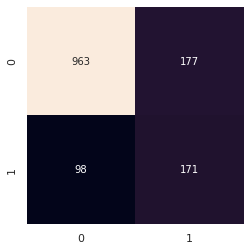

In [150]:
sns.heatmap(mat.T, square= True, annot=True, fmt='d', cbar= False)